Can we predict them all?

This is an exploration and analysis of the Pokemon from genrations 1 to 6. The data is from [kaggle user alopez247](https://www.kaggle.com/alopez247/pokemon/data).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

In [20]:
df_master = pd.read_csv('../data/pokemon_alopez247.csv')
df_master = df_master.set_index('Number')

In [21]:
df_master.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


The pokemon data has many features, both numerical and categorical.

Numerical features include: `Total`, `HP`, `Attack` and `Weight_kg` to name a few. Categorical features include: `Type_1` and `Egg_Group_1`. There are also binary categorical variables like `isLegendary` and `hasMegaEvolution`.

In [38]:
list(df_master)

['Name',
 'Type_1',
 'Type_2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp_Atk',
 'Sp_Def',
 'Speed',
 'Generation',
 'isLegendary',
 'Color',
 'hasGender',
 'Pr_Male',
 'Egg_Group_1',
 'Egg_Group_2',
 'hasMegaEvolution',
 'Height_m',
 'Weight_kg',
 'Catch_Rate',
 'Body_Style']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

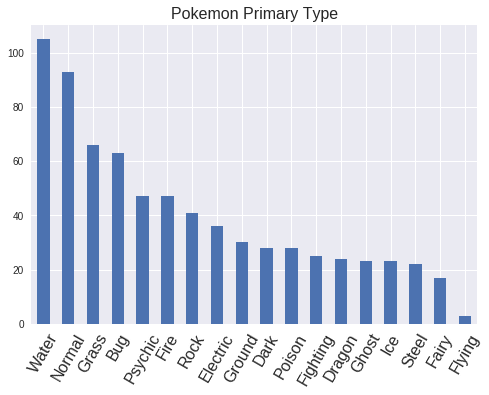

In [35]:
df_master['Type_1'].value_counts().plot( kind='bar')
plt.title('Pokemon Primary Type', fontsize=16)
plt.xticks( fontsize=16, rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

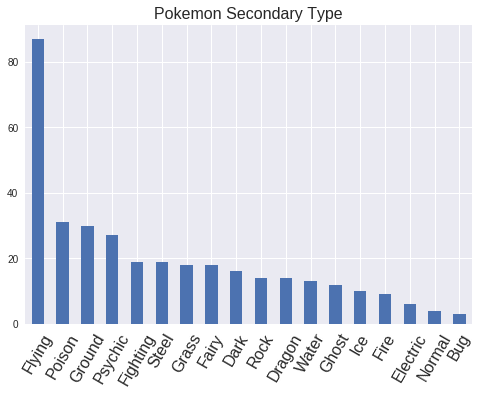

In [36]:
df_master['Type_2'].value_counts().plot( kind='bar')
plt.title('Pokemon Secondary Type', fontsize=16)
plt.xticks( fontsize=16, rotation=60)